# Assignment 3
## Numerical Optimization & Large Scale Linear Algebra
### Professor: P. Vassalos

### Stratos Gounidellis, DS3517005

In [3]:
# import necessary libraries
import numpy as np
from scipy.linalg import toeplitz
from scipy.sparse.linalg import inv
from scipy import linalg
import scipy.sparse as sparse
from numpy import linalg as LA
import scipy.sparse
import math
import matplotlib.pyplot as plt
import time
from spectrum import CHOLESKY
import pandas as pd
% matplotlib inline


In [14]:
# method to create toeplitz matrix. As input is given a power of two.
# For instance, if we want an 8x8 matrix the input should be 3.
def create_toeplitz(power_two):
    # initialize all the elements of the toeplitz
    # matrix apart from the diagonal
    toeplitz_c = np.asarray([((-1)**k)*2/(k)**2 for
                             k in range(1, 2**power_two)])
    # add also the element of the diagonal
    toeplitz_c = np.hstack(([math.pi**2/3], toeplitz_c))
    # create the toeplitz matrix using the built-in library
    # of scipy
    toeplitz_mat = toeplitz(toeplitz_c)
    # return the toeplitz matrix
    return toeplitz_mat


In [15]:
# method to create tridiagonal matrix
def create_tridiag(n):
    # initialize a matrix with zeros according to the required dimensions
    diagonals = np.zeros((3, n))
    # fill the first line with the element of the first lower diagonal
    diagonals[0, :] = -1
    # fill the first line with the element of the  diagonal
    diagonals[1, :] = 2
    # fill the first line with the element of the first upper diagonal
    diagonals[2, :] = -1
    # create the tridiagonal matrix using the structure of a sparse matrix
    # for memory efficiency reasons
    tridiag = scipy.sparse.spdiags(diagonals, [-1, 0, 1], n, n, format='csc')
    return tridiag


## Question 1

### Steepest descent method

In [16]:
# implement steepest descent method
# The steepest descent algorithm descends along a function by 
# taking steps in the opposite direction of the gradient of that function,
# at a given position. Step by step, it approaches the nearer local minimum.
def steep_descent(A, tol=10**-7, max_iter=1000):
    x_old = np.zeros(A.shape[0])
    b = np.ones(A.shape[0])
    r_old = b.copy()
    k = 0
    r_new = r_old.copy()
    x_new = x_old.copy()
    while scipy.linalg.norm(r_old) > tol and k < max_iter:
        k += 1
        r_dot = np.dot(r_old, r_old)
        a = r_dot / np.dot(np.dot(A, r_old), r_old)
        x_new = x_old + np.dot(a, r_old)
        r_new = b - np.dot(A, x_new)
        x_old = x_new.copy()
        r_old = r_new.copy()
    return x_old, k, scipy.linalg.norm(r_old)


### Conjugate gredient method

In [17]:
# implement the conjugate gredient method
# the conjugate gradient method is an algorithm for the numerical solution
# of particular systems of linear equations, namely those
# whose matrix is symmetric and positive-definite. The conjugate
# gradient method is often implemented as an iterative algorithm.
def conjugate_grad(A, tol=10**-7):
    n = A.shape[0]
    x_old = np.zeros(A.shape[0])
    b = np.ones(A.shape[0])
    r_old = b.copy()
    p = r_old.copy()

    alpha_1 = np.dot(r_old, r_old)/np.dot(np.dot(A, p), p)
    x_new = x_old + alpha_1*p
    r_old2 = b - np.dot(A, x_new)

    p_old = p.copy()
    k = 0

    while k < n and scipy.linalg.norm(r_old2) > tol:
        k += 1
        beta = np.dot(r_old2, r_old2)/np.dot(r_old, r_old)
        p = r_old2 + np.dot(beta, p_old)
        alpha = np.dot(r_old2, r_old2)/np.dot(np.dot(A, p), p)
        x = x_old + np.dot(alpha, p)
        r = b - np.dot(A, x)
        x_old = x.copy()
        p_old = p.copy()
        r_old = r_old2.copy()
        r_old2 = r.copy()
        if k >= 1000:
            break
    return x, k, scipy.linalg.norm(r_old2)


### Preconditioned conjugate gredient method

In [18]:
# implement the preconditioned conjugate gradient
# preconditioning is the application of a transformation, called
# the preconditioner, that conditions a given problem into a form that is
# more suitable for numerical solving methods. Preconditioning is
# typically related to reducing a condition number of the problem.
# In most cases, preconditioning is necessary to ensure fast convergence 
# of the conjugate gradient method. 
def p_conjugate_grad(A, M, tol=10**-7):
    inv_M = inv(M)
    n = A.shape[0]
    x_old = np.zeros(A.shape[0])
    b = np.ones(A.shape[0])
    r_old = b.copy()
    z = inv_M.dot(r_old)
    p = r_old.copy()

    alpha_1 = np.dot(r_old, r_old)/np.dot(np.dot(A, p), p)
    x_new = x_old + alpha_1*p
    r_old2 = b - np.dot(A, x_new)

    p_old = p.copy()
    k = 0

    while k < n and scipy.linalg.norm(r_old2) > tol:
        k += 1
        beta = np.dot(r_old2, r_old2)/np.dot(r_old, r_old)
        z = inv_M.dot(r_old2)
        p = z + np.dot(beta, p_old)
        alpha = np.dot(z, r_old2)/np.dot(np.dot(A, p), p)
        x = x_old + np.dot(alpha, p)
        r = b - np.dot(A, x)
        x_old = x.copy()
        p_old = p.copy()
        r_old = r_old2.copy()
        r_old2 = r.copy()
        if k >= 1000:
            break
    return x, k, scipy.linalg.norm(r_old2)


## Question 2

In [6]:
print("Solve the system with steepest descent!")
for i in range(9, 14):
    toeplitz_mat = create_toeplitz(i)
    start_time = time.clock()
    steep_desc = steep_descent(toeplitz_mat)
    end_time = time.clock()
    print ("Size: 2^" + str(i),  
           ", Iterations:", steep_desc[1], 
           ", Time needed:", end_time-start_time,
           ", Error:", steep_desc[2])


Solve the system with steepest descent!
Size: 2^9 , Iterations: 1000 , Time needed: 0.16750709531424815 , Error: 30.317156739363718
Size: 2^10 , Iterations: 1000 , Time needed: 1.4071947908699582 , Error: 44.04579598728225
Size: 2^11 , Iterations: 1000 , Time needed: 6.848945658426199 , Error: 63.32883502032458
Size: 2^12 , Iterations: 1000 , Time needed: 24.267796359740338 , Error: 90.92356230275138
Size: 2^13 , Iterations: 1000 , Time needed: 97.24953817247459 , Error: 131.3112886851631


In [7]:
print("Solve the system with conjugate gradient!")
for i in range(9, 14):
    toeplitz_mat = create_toeplitz(i)
    start_time = time.clock()
    conj_grad = conjugate_grad(toeplitz_mat)
    end_time = time.clock()
    print ("Size: 2^" + str(i),  
           ", Iterations:", conj_grad[1], 
           ", Time needed:", end_time-start_time,
           ", Error:", conj_grad[2])


Solve the system with conjugate gradient!
Size: 2^9 , Iterations: 512 , Time needed: 0.0830321643711045 , Error: 0.003420879747037168
Size: 2^10 , Iterations: 1000 , Time needed: 1.3455449643811903 , Error: 0.001635195372485668
Size: 2^11 , Iterations: 1000 , Time needed: 6.291670748974411 , Error: 655.3160332151992
Size: 2^12 , Iterations: 1000 , Time needed: 25.958346238693338 , Error: 2511.8137513842735
Size: 2^13 , Iterations: 1000 , Time needed: 99.82369013229837 , Error: 6096.549350274443


### Comments

Although we cannot judge by the number of iterations as it is constant (1000) the condition number seems to increase extremely as n increases and thus the problem becomes more and more ill-conditioned.

## Question 3

In [9]:
print("Solve the system with preconditioned conjugate gradient!")
for i in range(6, 11):
    toeplitz_mat = create_toeplitz(i)
    tridiag = create_tridiag(2**i)
    start_time = time.clock()
    conj_grad = p_conjugate_grad(toeplitz_mat, tridiag)
    end_time = time.clock()
    print ("Size: 2^" + str(i),  
           ", Iterations:", conj_grad[1], 
           ", Time needed:", end_time-start_time, 
           ", Error:", conj_grad[2])

Solve the system with preconditioned conjugate gradient!
Size: 2^6 , Iterations: 59 , Time needed: 0.0262921689222253 , Error: 9.71467312105853e-08
Size: 2^7 , Iterations: 117 , Time needed: 0.04108408184418977 , Error: 9.091826193580368e-08
Size: 2^8 , Iterations: 256 , Time needed: 0.11867703204109148 , Error: 5.978432677850982e-07
Size: 2^9 , Iterations: 512 , Time needed: 0.42322640847515913 , Error: 4.220547399584723e-06
Size: 2^10 , Iterations: 1000 , Time needed: 2.860731544281691 , Error: 1.219977425165745e-06


In [10]:
print("Solve the system with conjugate gradient!")
for i in range(6, 11):
    toeplitz_mat = create_toeplitz(i)
    start_time = time.clock()
    conj_grad = conjugate_grad(toeplitz_mat)
    end_time = time.clock()
    print ("Size: 2^" + str(i),  
           ", Iterations:", conj_grad[1], 
           ", Time needed:", end_time-start_time,
           ", Error:", conj_grad[2])

Solve the system with conjugate gradient!
Size: 2^6 , Iterations: 64 , Time needed: 0.002783607137700983 , Error: 0.033032334499895254
Size: 2^7 , Iterations: 128 , Time needed: 0.00710361055098474 , Error: 0.013514289820533902
Size: 2^8 , Iterations: 256 , Time needed: 0.017637544799981697 , Error: 0.006389570407130786
Size: 2^9 , Iterations: 512 , Time needed: 0.08797992136686617 , Error: 0.003420879747037168
Size: 2^10 , Iterations: 1000 , Time needed: 1.1721992471697718 , Error: 0.001635195372485668


### Comments

It is obvious that the preconditioned conjugate gradient method outperforms when it comes to number of iterations and error in comparison with conjugate gradient method. This happens because preconditioning leads to reducing the condition number of the problem. Additionally, we observe that for 2^6 and 2^7 the preconditioned conjugate gradient method needed fewer iterations to achieve the tolerance level than the dimension of the toeplitz matrix.

## Question 4

In [19]:
def cond_toeplitz(min_power=10, max_power=13):
    cond_numbers = []
    for i in range(min_power, max_power + 1) :
        toeplitz_mat = create_toeplitz(i)
        cond_numbers.append(LA.cond(toeplitz_mat, 2))
    return cond_numbers, min_power, max_power

def cond_pre_toeplitz(min_power=10, max_power=13):
    cond_numbers = []
    for i in range(min_power, max_power + 1) :
        toeplitz_mat = create_toeplitz(i)
        tridiag = create_tridiag(2**i)
        p_toeplitz = np.dot(inv(tridiag).todense(), toeplitz_mat)
        cond_numbers.append(LA.cond(p_toeplitz, 2))
    return cond_numbers, min_power, max_power

cond_numbers_pre_t, min_power, max_power = cond_pre_toeplitz(min_power=10, max_power=13)
cond_numbers_t, min_power, max_power = cond_toeplitz(min_power=10, max_power=13)
dimensions = np.arange(min_power, max_power + 1, 1)


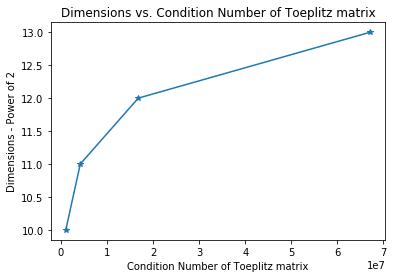

In [20]:
plt.plot(cond_numbers_t, dimensions, marker='*')
plt.title('Dimensions vs. Condition Number of Toeplitz matrix')
plt.ylabel('Dimensions - Power of 2')
plt.xlabel("Condition Number of Toeplitz matrix")
plt.show()


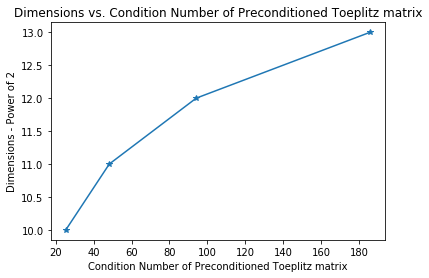

In [21]:
plt.plot(cond_numbers_pre_t, dimensions, marker='*')
plt.title('Dimensions vs. Condition Number of Preconditioned Toeplitz matrix')
plt.ylabel('Dimensions - Power of 2')
plt.xlabel("Condition Number of Preconditioned Toeplitz matrix")
plt.show()


### Comments

We observe that as n increases the condition number of T (toeplitz matrix) increases exponentially. A high condition number means that the matrix is almost non-invertible. The higher the condition number, the greater the error in the calculation. That is why preconditioning is of critical importance. It is obvious that the condition number of the preconditioned T matrix is significantly smaller and thus the problem becomes more well-conditioned. The higher condition number of the intial T matrix explain also the need for more iterations and the higher residual norm.

## Question 5

In [22]:
toeplitz_mat13 = create_toeplitz(13)
b13 = np.ones(2**13)
tridiag13 = create_tridiag(2**13)


### Cholesky Decomposition

In [14]:
start = time.clock()
x_cho = CHOLESKY(toeplitz_mat13, b13)
end = time.clock()
print ("Time of simple Cholesky factorization for 2^13x2^13 matrix:", end - start, "seconds")
time13 = end - start
acc13 = 1 - scipy.linalg.norm(np.dot(toeplitz_mat13, x_cho) - b13)/scipy.linalg.norm(b13)
print("Accuracy of simple Cholesky factorization for 2^13x2^13 matrix:", acc13)
print(x_cho)


Time of simple Cholesky factorization for 2^13x2^13 matrix: 8.374555950266313 seconds
Accuracy of simple Cholesky factorization for 2^13x2^13 matrix: 0.9999999654876931
[  3543.98468312   7721.40557256  11782.37360061 ...,  11782.37360129
   7721.405573     3543.98468332]


### Successive Over-Relaxation (SOR)

In [15]:
# this implementation of successive over-relaxation iterative method
# is based on the following two links 
# 1. https://en.wikipedia.org/wiki/Successive_over-relaxation and
# 2. https://www.maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-the-sor-method


# That implemementation is memory efficient as it does not compute
# L, D, U matrices as well as the inverse matrice. On the contary,
# only the initial matrix of the linear system is used and dot products are
# implemented. The method terminated when the relative error is lower than
# a given threshold.
def sor(A, x, b, omega, tol, max_iter):
    error = 1
    iteration = 0
    w = (omega/np.diagonal(A))
    while (error > tol) and iteration < max_iter:
        iteration += 1
        x_prev = x.copy()
        for i in range(len(x)):
            before = np.dot(A[i, 0:i], x[0:i])
            after = np.dot(A[i, i:len(x)], x_prev[i:len(x)])
            x[i] += w[i] * (b[i] - before - after)
        error = scipy.linalg.norm(x - x_prev)/scipy.linalg.norm(x)
    print (x, iteration)
    return (error, iteration)

# the above method is applied in a 2^13x2^13 matrix
# different omegas are given as parameter its time and
# the best omega with the least number of iterations
# will be presented at the end
iterations = []
errors = []
time_sor = []
for w in np.arange(.1, 2, .1):
    x = np.zeros(2**13)
    print(w, x)
    start_time = time.clock()
    output = sor(toeplitz_mat13, x, b13, w, 10**(-7), 1000)
    end = time.clock()
    errors.append(output[0])
    iterations.append(output[1])
    time_sor.append(start_time - end_time)


0.1 [ 0.  0.  0. ...,  0.  0.  0.]
[  5.08786246  10.30986224  14.53641132 ...,  14.62792436  10.37776272
   5.12254562] 1000
0.2 [ 0.  0.  0. ...,  0.  0.  0.]
[  7.56428969  15.68138448  22.6671887  ...,  22.88350926  15.83494884
   7.639932  ] 1000
0.3 [ 0.  0.  0. ...,  0.  0.  0.]
[  9.62740051  20.16628391  29.48199855 ...,  29.84271309  20.41766264
   9.74929879] 1000
0.4 [ 0.  0.  0. ...,  0.  0.  0.]
[ 11.52380096  24.29244793  35.76145208 ...,  36.28751888  24.6551057
  11.69802407] 1000
0.5 [ 0.  0.  0. ...,  0.  0.  0.]
[ 13.35526248  28.27925612  41.83398291 ...,  42.54961083  28.76895308
  13.58900138] 1000
0.6 [ 0.  0.  0. ...,  0.  0.  0.]
[ 15.18151149  32.25594043  47.89435285 ...,  48.82842989  32.89159828
  15.48344821] 1000
0.7 [ 0.  0.  0. ...,  0.  0.  0.]
[ 17.04696735  36.31886196  54.08844929 ...,  55.2762164   37.12363577
  17.42775663] 1000
0.8 [ 0.  0.  0. ...,  0.  0.  0.]
[ 18.9914218   40.55450132  60.54762321 ...,  62.03292594  41.55724744
  19.46436178

In [16]:
pd.DataFrame({'Omega': list(np.arange(.1, 2, .1)),
              'Iterations': iterations,
              'Time': time_sor, 
              'Error': errors},
             columns=["Omega", "Error", "Iterations", "Time"])

,Omega,Error,Iterations,Time
0,0.1,0.001000,1000,1615.841628
1,0.2,0.001000,1000,1750.714833
2,0.3,0.000999,1000,1846.944837
3,0.4,0.000999,1000,1942.256995
4,0.5,0.000999,1000,2039.730865
5,0.6,0.000999,1000,2138.897170
6,0.7,0.000999,1000,2233.355429
7,0.8,0.000999,1000,2328.418019
8,0.9,0.000999,1000,2421.553541
9,1.0,0.000998,1000,2515.353500


In [17]:
# diagonal part of A and rest
D = np.diag(toeplitz_mat13)
R = toeplitz_mat13 - np.diagflat(D)
D = np.diag(D)

# iteration matrix of Jacobi
Tj = np.dot(np.linalg.inv(D), R)
# spectral radius of the iteration matrix
beta, _ = sparse.linalg.eigsh(Tj, 1, which='LM')

if abs(beta) >= 1:
# If beta is smaller than one we cannot apply the formula to compute the optimum omega.
# Additionally, the standard convergence condition (for any iterative method and Jacobi) 
# is when the spectral radius of the iteration matrix is less than 1. Consequently, we can
# conclude that Jacobi would not converge.
    print("Since the spectral radius of Tj is greater than one (" +
          str(beta[0]) + ") optimum omega cannot be computed numerically and thus Jacobi method does not converge.")
else:
# If the above condition is false run SOR with optimum omega
# The following formula can be used for bicyclic matriced or 
# consistently ordered matrices
    wopt = 2 / (1 + np.sqrt(1 - beta**2))
    wopt = np.real(wopt)
    x = np.ones(2**13)
    sor(toeplitz_mat13, x, b13, wopt, 10**(-7))


Since the spectral radius of Tj is greater than one (1.99946027836) optimum omega cannot be computed numerically and thus Jacobi method does not converge.


In [18]:
# method to check whether the matrix is diagonally dominant.
# In mathematics, a square matrix is said to be diagonally dominant if
# for every row of the matrix, the magnitude of the diagonal entry
# in a row is larger than or equal to the sum of the magnitudes of all
# the other (non-diagonal) entries in that row. If the matrix is not diagonal
# dominant it is another indication that the Jacobi method does not converge.
def check_diagonal_dominant(A):
    D = np.diag(np.abs(A))
    S = np.sum(np.abs(A), axis=1) - D
    if np.all(D > S):
        print ('Matrix is strictly diagonal dominant!')
    else:
        print ('Matrix is not diagonal dominant!')
    return
# We observe that the matrix is not diagonally dominant, so
# that observation comes to verify the above results, that the 
# spectral radius of the Jacobi transition matix is greater than 1
# and thus the Jacobi iteration method will not converge. 
check_diagonal_dominant(toeplitz_mat13)


Matrix is not diagonal dominant!


### Jacobi iterative method

It was proven above that specral radius of the transition (or iterative) matrix of the Jacobi iterative method is greater than 1. Additionaly, the T matrix is not diagonal dominant. Consequently, tha Jacobi method will not converge. However, for the completeness of the project the executable python code is presented below, although there is no reason for running it as the results will not be credible and the method will not converge.

In [19]:
# this implementation of the Jacobi iterative method
# is based on the following link
# 1. https://www.maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-the-sor-method

# Obviously, the implementation is very similar to SOR
def jacobi(A, x, b, tol, max_iter):
    error = 1
    iteration = 0
    w = (1/np.diagonal(A))
    while (error > tol) and iteration < max_iter:
        iteration += 1
        x_prev = x.copy()
        for i in range(len(x)):
            before = np.dot(A[i, 0:i], x_prev[0:i])
            after = np.dot(A[i, i:len(x)], x_prev[i:len(x)])
            x[i] += w[i] * (b[i] - before - after)
        error = scipy.linalg.norm(x - x_prev)/scipy.linalg.norm(x)
    print (x, iteration)
    return (x, error, iteration)

# x = np.zeros(2**13)
# output = jacobi(toeplitz_mat13, x, b13, 10**(-7), 1000)


### Preconditioned conjugate gradient method

In [25]:
start_time = time.clock()
p_conj_grad13 = p_conjugate_grad(toeplitz_mat13, tridiag13)
end_time = time.clock()
print ("Size: 2^" + str(13),  
       ", Iterations:", p_conj_grad13[1], 
       ", Time needed:", end_time-start_time,
       ", Error:", p_conj_grad13[2])

Size: 2^13 , Iterations: 1000 , Time needed: 186.93991817475018 , Error: 138.3434806206808


In [26]:
p_conj_grad13[0]

array([  3538.22949598,   7711.23294515,  11784.0194754 , ...,
        11784.01947394,   7711.23294403,   3538.22949545])

### Comments

Obviously, Cholesky decomposition is the fastest method. It only needs 8.374555950266313 seconds and in comparison to the preconditioned conjugate gradient method, which needs 186.93991817475018, it is 2132.237% faster. 